In [1]:
from pyFrame import Frame, Beam
import ipywidgets as widgets
import copy

In [2]:
BedFrame = Frame.Frame()

### Define Materials

In [3]:
#C24 Norm for German Construction wood in mm
E = 11000
G = 690
KVH = Beam.Material(E,G)
KVH.tensile_yield_strength = 14
KVH.compressive_yield_strength = 21
KVH.flexural_yield_strength = 24
KVH.shear_strength = 4

### Define Crosssections

In [4]:
def rect_crosssection(width, height):
    return Beam.Crosssection([(0,0),(0,height),(width,height),(width,0)])

In [5]:
T60100 = rect_crosssection(60,100)
T60120 = rect_crosssection(60,120)
T80100 = rect_crosssection(80,100)
T80140 = rect_crosssection(80,140)
T100100 = rect_crosssection(100,100)

T10060 = rect_crosssection(100, 60)
T12060 = rect_crosssection(120, 60)
T10080 = rect_crosssection(100, 80)
T14080 = rect_crosssection(140, 80)


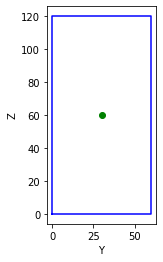

In [6]:
T60120.plot()

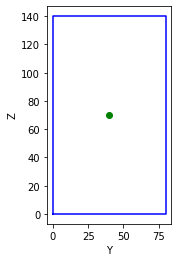

In [7]:
T80140.plot()

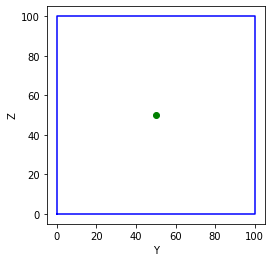

In [8]:
T100100.plot()

## Create Base Frame

### Define Nodes

In [9]:
#addding nodes to Frame
xDim = 2200
yDim = 2600
zDim = 3000

BedFrame.addNode('G1',   0,0,0)
BedFrame.addNode('G2',xDim,0,0)
BedFrame.addNode('G3',   0,yDim,0)
BedFrame.addNode('G4',xDim,yDim,0)

BedFrame.addNode('G5',   0,1000,0)

BedFrame.addNode('T1',   0,1000,zDim)
BedFrame.addNode('T2',xDim,1000,zDim)
BedFrame.addNode('T3',   0,yDim,zDim)
BedFrame.addNode('T4',xDim,yDim,zDim)


BedFrame.addNode('P1',   0,0,zDim - 1000)
BedFrame.addNode('P2',xDim,0,zDim - 1000)
BedFrame.addNode('P3',   0,1000,zDim - 1000)
BedFrame.addNode('P4',xDim,1000,zDim - 1000)


### Add Members

In [10]:
#add Members 
BedFrame.addMember('col1', 'G1','P1', KVH, T14080)
BedFrame.addMember('col2', 'G2','P2', KVH, T14080)
BedFrame.addMember('col3', 'G3','T3', KVH, T14080)
BedFrame.addMember('col4', 'G4','T4', KVH, T14080)

BedFrame.addMember('col5', 'G5','P3', KVH, T14080)


BedFrame.addMember('TopBeam1', 'T1','T2', KVH, T60100)
BedFrame.addMember('TopBeam2', 'T3','T4', KVH, T60100)
BedFrame.addMember('TopBeam3', 'T1','T3', KVH, T80140)
BedFrame.addMember('TopBeam4', 'T2','T4', KVH, T80140)

BedFrame.addMember('PlattFormBeam1', 'P1','P2', KVH, T60100)
BedFrame.addMember('PlattFormBeam2', 'P3','P4', KVH, T60100)
BedFrame.addMember('PlattFormBeam3', 'P1','P3', KVH, T60120)
BedFrame.addMember('PlattFormBeam4', 'P2','P4', KVH, T60120)

BedFrame.addMember('Diagonal2', 'P4','T2', KVH, T60120)
BedFrame.addMember('Diagonal1', 'P3','T1', KVH, T60120)
BedFrame.addMember('Diagonal3', 'P1','T1', KVH, T60100)
BedFrame.addMember('Diagonal4', 'P2','T2', KVH, T60100)



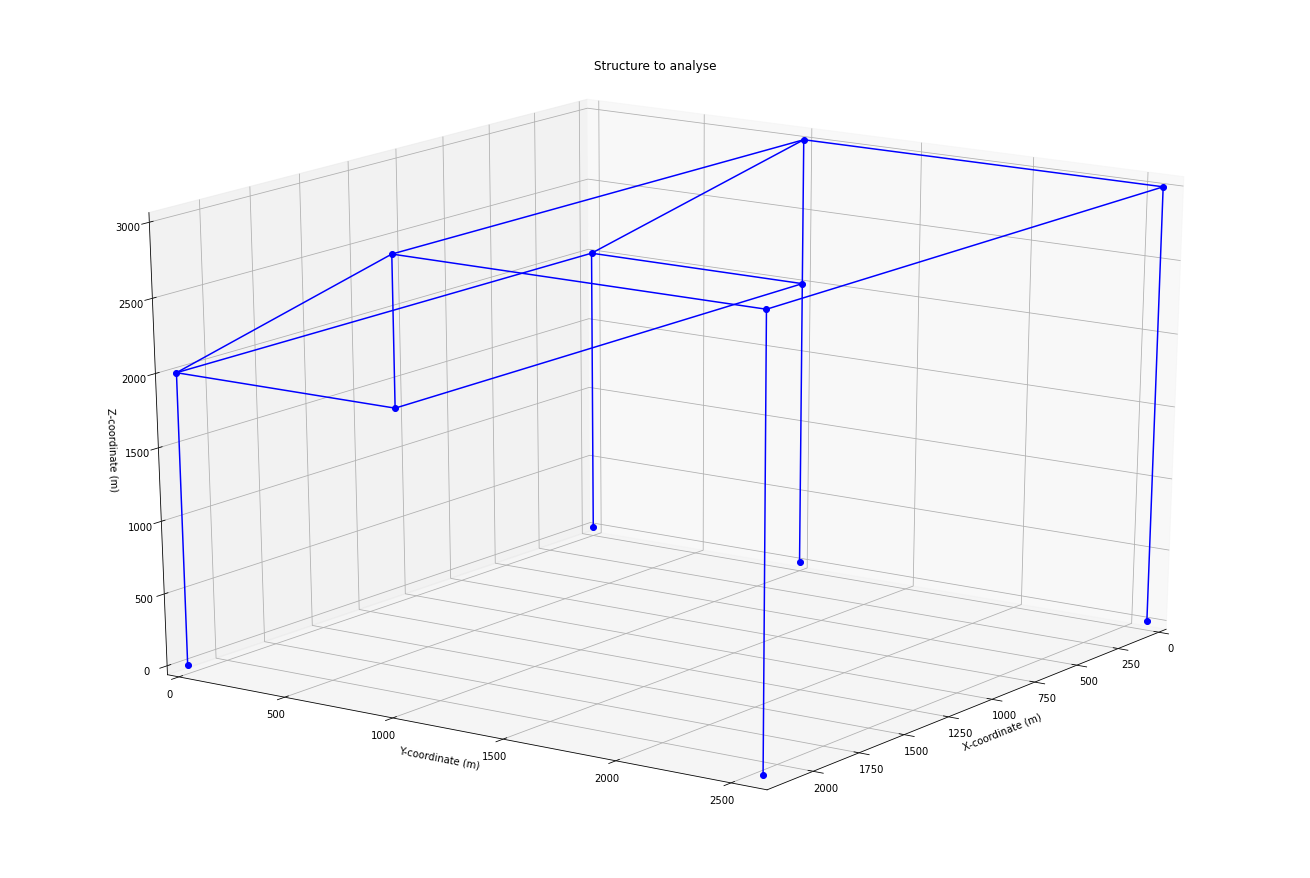

In [11]:
BedFrame.plot(deformed=False, showMemberName= False, showNodeName = False)

### Add diagonals

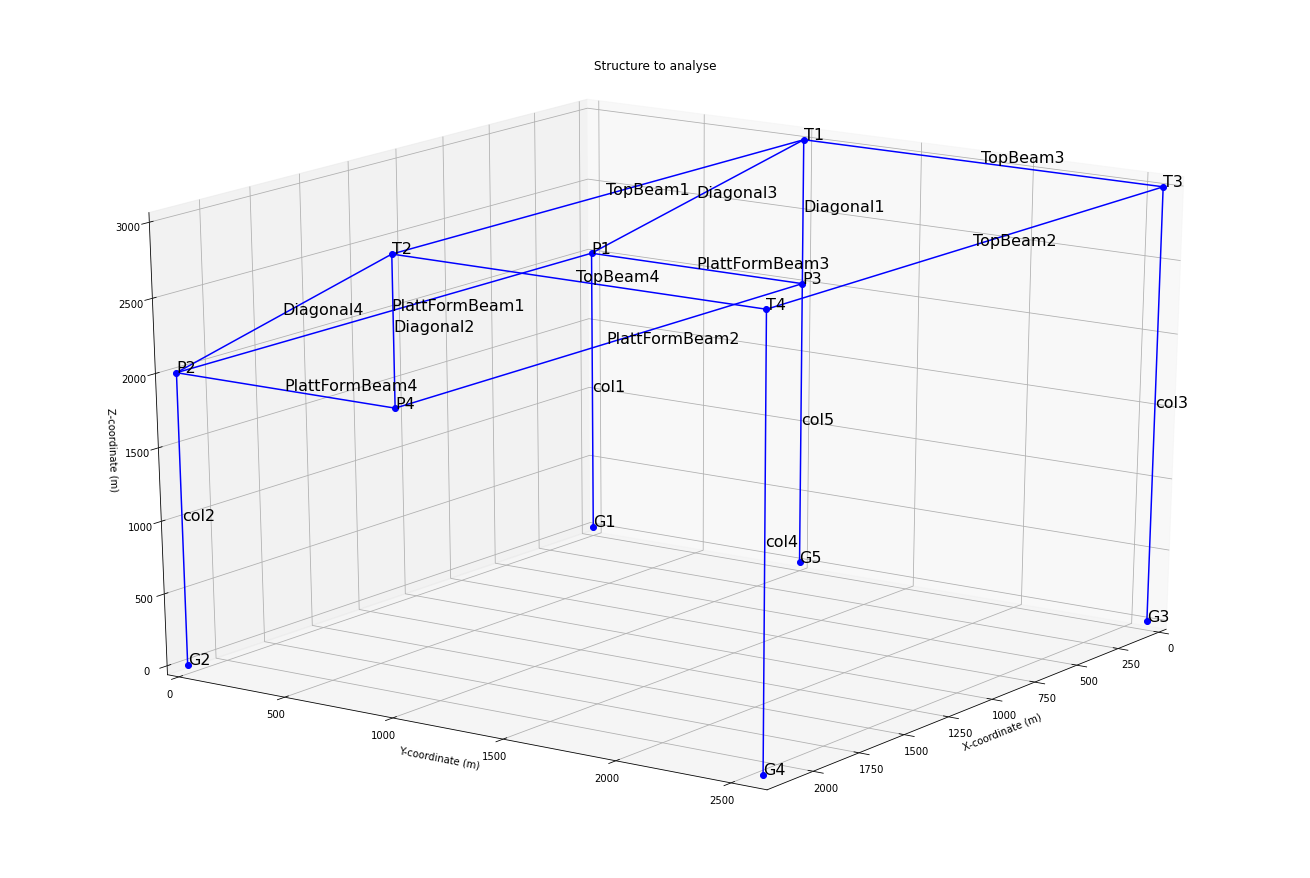

In [12]:
BedFrame.plot(deformed=False)

In [13]:
#create supports 
BedFrame.makeSupport('G1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G3', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G4', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
BedFrame.makeSupport('G5', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)

In [14]:

#BedFrame.addNodeLoad('5', Fy=lol*1000,Fx=lol*1000)

In [15]:
#set member loads
BedLoad = 10000

x1 = 100
x2 = 1500

a = abs(BedFrame.Nodes['T2'].x- BedFrame.Nodes['T3'].x)
b = abs(BedFrame.Nodes['T2'].y- BedFrame.Nodes['T3'].y)


BedFrame.addMemberPtForce('TopBeam3', x=x1,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam3', x=x1,Fx = BedLoad/4)

BedFrame.addMemberPtForce('TopBeam3', x=x2,Fz=-BedLoad)
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fy=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=-BedLoad/4*b/((a**2+b**2)**(0.5)))
BedFrame.addMemberPtForce('TopBeam3', x=x2,Fx=-BedLoad/4)


BedFrame.addMemberPtForce('TopBeam4', x=x1,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam4', x=x1,Fx=BedLoad/4*a/((a**2+b**2)**(0.5)), Fy=BedLoad/4*b/((a**2+b**2)**(0.5)))


BedFrame.addMemberPtForce('TopBeam4', x=x2,Fz=-BedLoad/4)
BedFrame.addMemberPtForce('TopBeam4', x=x2,Fy=BedLoad/4)

In [16]:
2500/(2**(0.5))

1767.7669529663688

In [17]:
BedFrame.analyze()

In [18]:
#BedFrame.plot()
widgets.interact(BedFrame.plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,50,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Compute minimum Margin of Safeties

In [19]:
BedFrame.MoS()

Member TopBeam2 : AxialMoS 40.049 , ShearMoS 68.121 , FlexuralMoS 0.662
Member Diagonal2 : AxialMoS 476.95 , ShearMoS 51.739 , FlexuralMoS 1.022
Member TopBeam1 : AxialMoS 156.589 , ShearMoS 75.126 , FlexuralMoS 1.17
Member TopBeam3 : AxialMoS 55.49 , ShearMoS 13.806 , FlexuralMoS 1.481
Member col5 : AxialMoS 213.091 , ShearMoS 73.655 , FlexuralMoS 1.636
Member TopBeam4 : AxialMoS 184.319 , ShearMoS 14.103 , FlexuralMoS 1.655
Member Diagonal4 : AxialMoS 145.57 , ShearMoS 35.172 , FlexuralMoS 1.664
Member col4 : AxialMoS 55.4 , ShearMoS 50.144 , FlexuralMoS 1.733
Member col3 : AxialMoS 24.16 , ShearMoS 427.99 , FlexuralMoS 2.985
Member PlattFormBeam3 : AxialMoS 167.124 , ShearMoS 28.767 , FlexuralMoS 3.07
Member Diagonal3 : AxialMoS 72.199 , ShearMoS 194.975 , FlexuralMoS 4.264
Member PlattFormBeam2 : AxialMoS 471.588 , ShearMoS 206.809 , FlexuralMoS 4.439
Member PlattFormBeam4 : AxialMoS 201.515 , ShearMoS 87.238 , FlexuralMoS 6.445
Member Diagonal1 : AxialMoS 76.514 , ShearMoS 237.675

In [20]:
widgets.interact(BedFrame.Members['col4'].plot, 
                 label_offset=(0.01, 0.1, 0.01), 
                 xMargin=(0.25, 3, 0.25),
                 yMargin=(0.25, 3, 0.25),
                 zMargin=(0.5, 3, 0.25),
                 elevation=(0,360,10),
                 rotation=(0,360,10),
                 xFac=(1,20,1))

interactive(children=(FloatSlider(value=0.01, description='label_offset', max=0.1, min=0.01, step=0.01), Float…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [21]:
Bed = Frame.Frame()

In [22]:
Bed.addNode('B1',   0,0,0)
Bed.addNode('B2',2100,0,0)
Bed.addNode('B3',   0,1400,0)
Bed.addNode('B4',2100,1400,0)


In [23]:
Bed.addMember('1', 'B1','B3', KVH, T100100)
Bed.addMember('2', 'B2','B4', KVH, T100100)
Bed.addMember('3', 'B1','B2', KVH, T100100)
Bed.addMember('4', 'B3','B4', KVH, T100100)

In [24]:
Bed.makeSupport('B1', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
Bed.makeSupport('B2', Ux=0,Uy=0,Uz=0,Rx=0,Ry=0,Rz=0)
Bed.makeSupport('B3', Uz=0,Rx=0,Ry=0,Rz=0)
Bed.makeSupport('B4', Uz=0,Rx=0,Ry=0,Rz=0)

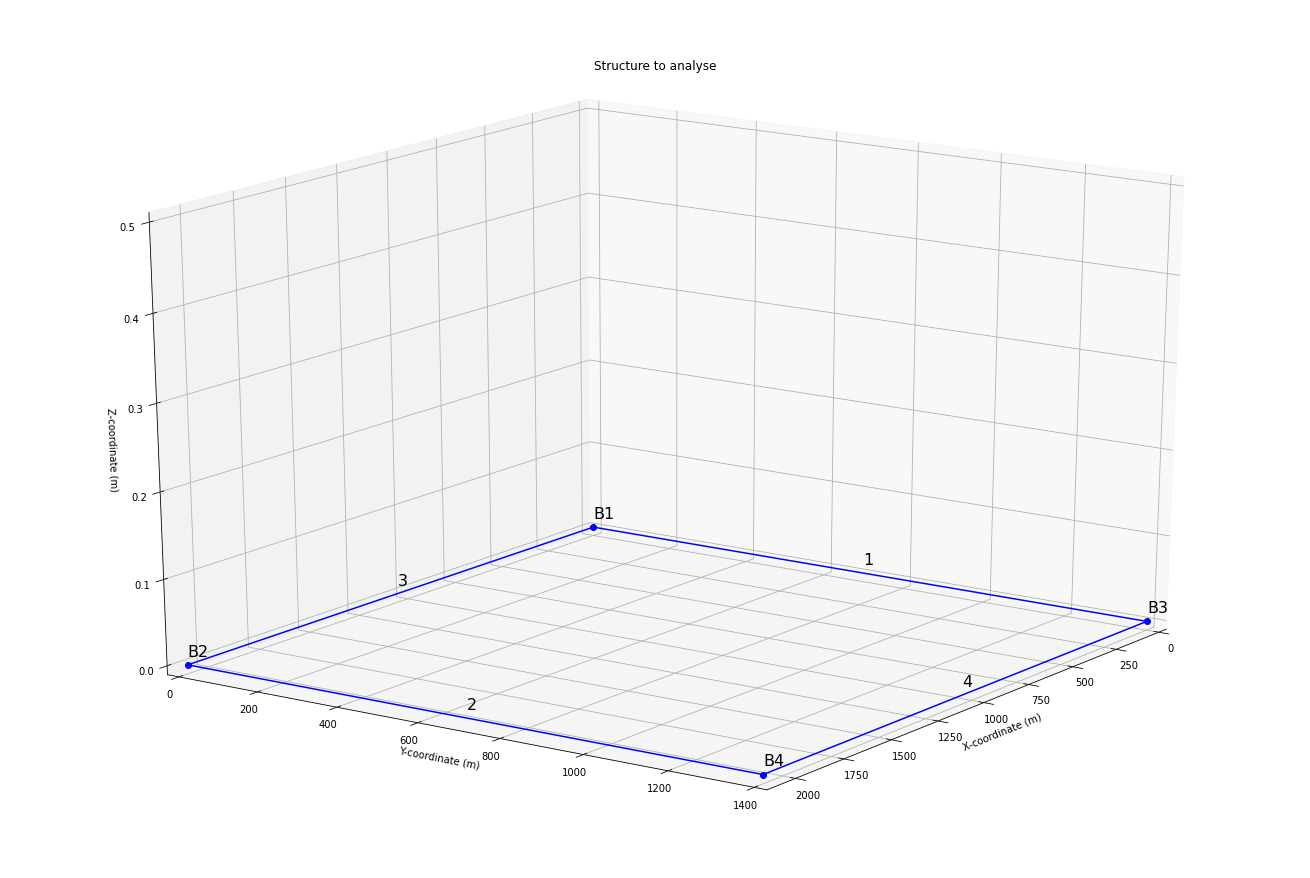

In [25]:
Bed.plot(deformed=False)

In [26]:
Bed.addMemberPtForce('1', x=x1,Fz=BedLoad/4)
Bed.addMemberPtForce('1', x=x2 - 200,Fz=BedLoad)
Bed.addMemberPtForce('2', x=x1,Fz=BedLoad/4)
Bed.addMemberPtForce('2', x=x2- 200,Fz=BedLoad/4)

In [27]:
Bed.analyze()

In [28]:
Bed.MoS()

Member 1 : AxialMoS inf , ShearMoS 3.044 , FlexuralMoS 2.639
Member 2 : AxialMoS inf , ShearMoS 15.0 , FlexuralMoS 7.296
Member 3 : AxialMoS inf , ShearMoS 39999999999.0 , FlexuralMoS inf
Member 4 : AxialMoS inf , ShearMoS 39999999999.0 , FlexuralMoS inf
